<a href="https://colab.research.google.com/github/Krishna737Sharma/Linear-Regression/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **

### 

### **Objective:**

You are to download the ***Student Performance*** dataset from [https://archive.ics.uci.edu/dataset/320/student+performance](https://archive.ics.uci.edu/dataset/320/student+performance) for this examination. After downloading the required .zip files, you will find a .csv file "***student-por.csv***", which provides the performance of students in the subject "*Portuguese*". This file contains 649 samples, with 30 features each. Note that the final three columns represent the following:

*   G1: 1st period grades
*   G2: 2nd period grades
*   G3: 3rd period (final year) grades

and both G1 and G2 are NOT to be considered as features.

(**Note**: Examinees may also use the code-block provided to them in the unsolved Notebook to load the required dataset.)

Your task is to predict the final year (G3) grades of students from a test-set extracted from the given dataset, using ***Linear Regression***. In our laboratory session on Linear Regression, we had dealt with continuous features. The given dataset, however, has *binary*, *integer* and *continuous* features, which need to be handled appropriately.  

After performing the necessary checks for duplicate and missing values for any sample, you need to perform ***one-hot encoding*** for the categorical features. If a certain categorial feature can take *k* distinct values, you should represent it using (*k-1*) binary features. Also, display the number of features in the encoded feature set thus obtained.

Scale the features so that all their values remain in the same range, and split the entire dataset into ***70% (train) - 15% (validation) - 15% (test)***. Implement linear regression *from scratch* on the dataset, with ***gradient descent*** and the ***mean-squared error (MSE)*** loss function.

You are also required to implement ***learning rate scheduling*** as follows: Start with a high learning rate (***0.1***) and ***reduce it by a factor of 0.1*** whenever the loss on the validation set does not reduce for ***10 consecutive steps***. Stop training when the learning rate reaches a threshold (***10^-5***) and the loss does not reduce further.

Plot the progression of both training and validation losses, and report the MSE loss on the test-set. Finally, show a scatter plot of the predicted final grades against the true grades.





**Step 1: Load the Dataset**

First, load the Student Performance dataset ("student-por.csv"). The examinees may also use the available code from UC Irvine's dataset repo page to do this.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('student-por.csv')

# Display the first few rows of the dataset
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**Step 2: Check for Duplicates and Missing Values (2 marks)**

Check for any duplicate entries and missing values.

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Number of missing values: {missing_values}")

# Remove rows with missing values if any
df = df.dropna()

Number of duplicate entries: 0
Number of missing values: 0


**Step 3: One-Hot Encoding for Categorical Features (2 marks)**

Identify categorical features and perform one-hot encoding. (Drop features "G1" and "G2")

In [ ]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Exclude G1 and G2 (first and second period grades)
df_encoded = df_encoded.drop(columns=['G1', 'G2'])

# Display the number of features after one-hot encoding
print(f"Number of features after one-hot encoding: {df_encoded.shape[1]}")

Number of features after one-hot encoding: 40


In [ ]:
# Display the features in encoded one-hot data-frame
df_encoded.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
# Display the first few rows of the encoded dataset
df_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False


**Step 4: Feature Scaling (2 marks)**

Normalize the features to ensure all are within the same range, between 0 and 1.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Exclude target feature (G3)
features = df_encoded.drop(['G3'], axis=1)

# Apply feature scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Create the final DataFrame with scaled features
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Add the target feature (G3) back to the scaled DataFrame
df_scaled['G3'] = df_encoded['G3'].values

In [ ]:
# Display the first few rows of the feature-scaled dataset
df_scaled.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,11
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,11
2,0.000000,0.25,0.25,0.000000,0.333333,0.0,0.75,0.50,0.25,0.25,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,12
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,14
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,13


**Step 5: Split Data into Training, Validation, and Test Sets (2 marks)**

Split the data into 70% training, 15% validation, and 15% test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_scaled.drop('G3', axis=1).values
y = df_scaled['G3'].values

# Split data into training (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 454
Validation set size: 97
Test set size: 98


**Step 6: Implement Linear Regression from Scratch (8 marks)**

Implement linear regression using gradient descent and mean squared error (MSE) as the loss function.

In [ ]:
import numpy as np

def initialize_parameters(n_features):
    return np.zeros(n_features)

def predict(X, theta):
    return X.dot(theta)

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, theta, learning_rate, num_iterations, X_val, y_val):
    m = len(y)
    training_losses = []
    validation_losses = []
    best_loss = float('inf')
    no_improvement_steps = 0
    min_learning_rate = 1e-5

    for i in range(num_iterations):
        # Prediction
        y_pred = predict(X, theta)

        # Compute gradients
        gradients = -(2/m) * X.T.dot(y - y_pred)

        # Update parameters
        theta -= learning_rate * gradients

        # Compute loss for training and validation sets
        train_loss = compute_mse(y, y_pred)
        val_loss = compute_mse(y_val, predict(X_val, theta))

        training_losses.append(train_loss)
        validation_losses.append(val_loss)

        # Learning rate scheduling
        if val_loss < best_loss:
            best_loss = val_loss
            no_improvement_steps = 0
        else:
            no_improvement_steps += 1

        if no_improvement_steps >= 10:
            learning_rate *= 0.1
            no_improvement_steps = 0
            print(f"Reduced learning rate to {learning_rate} at iteration {i}")

        if learning_rate < min_learning_rate:
            print("Learning rate reached the minimum threshold. Stopping training.")
            break

        print(f"Iteration {i}, Training loss: {train_loss:.4f}, Validation loss: {val_loss:.4f}")

    return theta, training_losses, validation_losses

# Initialize parameters
n_features = X_train.shape[1]
theta = initialize_parameters(n_features)

# Train model
num_iterations = 1000
initial_learning_rate = 0.1
theta, training_losses, validation_losses = gradient_descent(X_train, y_train, theta, initial_learning_rate, num_iterations, X_val, y_val)


Iteration 0, Training loss: 149.9802, Validation loss: 71.6545
Iteration 1, Training loss: 76.3627, Validation loss: 40.8937
Iteration 2, Training loss: 41.6851, Validation loss: 23.0482
Iteration 3, Training loss: 25.3007, Validation loss: 16.7674
Iteration 4, Training loss: 17.5145, Validation loss: 12.4048
Iteration 5, Training loss: 13.7737, Validation loss: 11.1983
Iteration 6, Training loss: 11.9398, Validation loss: 10.0370
Iteration 7, Training loss: 11.0079, Validation loss: 9.8230
Iteration 8, Training loss: 10.5054, Validation loss: 9.4663
Iteration 9, Training loss: 10.2098, Validation loss: 9.4238
Iteration 10, Training loss: 10.0162, Validation loss: 9.2891
Iteration 11, Training loss: 9.8746, Validation loss: 9.2686
Iteration 12, Training loss: 9.7613, Validation loss: 9.2042
Iteration 13, Training loss: 9.6647, Validation loss: 9.1848
Iteration 14, Training loss: 9.5790, Validation loss: 9.1472
Iteration 15, Training loss: 9.5012, Validation loss: 9.1287
Iteration 16, T

**Step 7: Plot the Training and Validation Losses (1 mark)**

Plot the variation of training and validation losses with training progress.

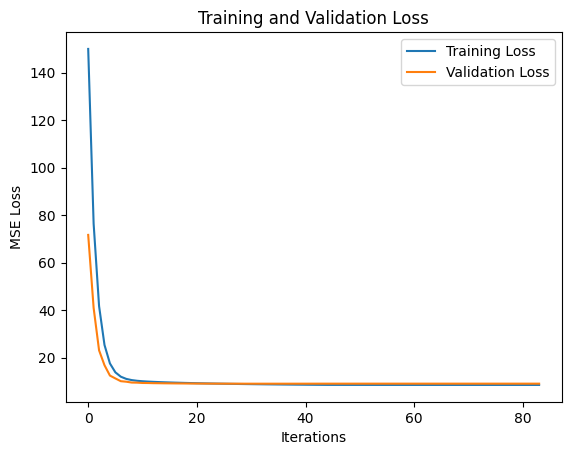

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Step 8: Evaluate Model on Test Set (2 marks)**

In [ ]:
# Predict on the test set
y_test_pred = predict(X_test, theta)

# Compute MSE on the test set
test_mse = compute_mse(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")


Test MSE: 10.7325


**Step 9: Scatter Plot of Predicted vs. True Grades (1 mark)**

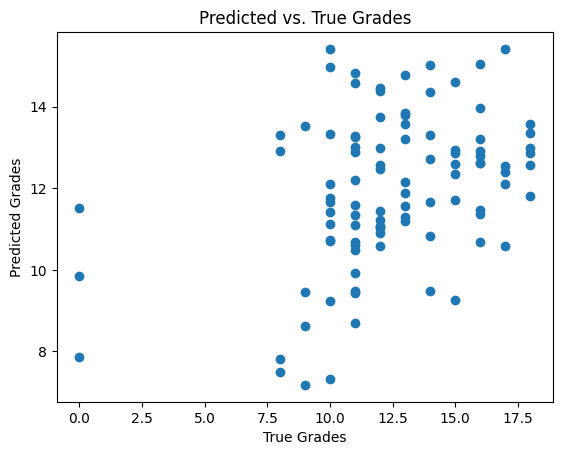

In [ ]:
# Scatter plot
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Grades')
plt.ylabel('Predicted Grades')
plt.title('Predicted vs. True Grades')
plt.show()

**Appendix:**

Reference performance of *scikit-learn*'s *LinearRegression* module on the dataset (for comparison).

Test MSE: 9.1813


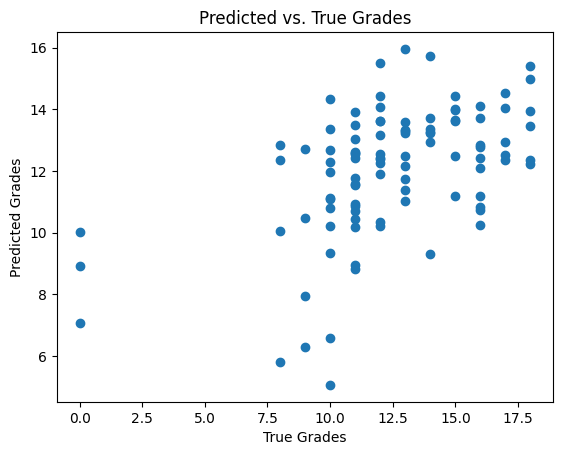

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute MSE on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")

# Plot the variation of predicted vs. true grades on the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Grades')
plt.ylabel('Predicted Grades')
plt.title('Predicted vs. True Grades')
plt.show()